In [1]:
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from six import StringIO
from IPython.display import Image  
import pydotplus
from sklearn.tree import export_graphviz

In [109]:
!pip install pydotplus
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 6.0 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24552 sha256=f2fbfbf495a616d301b4bc3a0806445ad40b6a3ac7740d2449fb12b4d577d5d0
  Stored in directory: /Users/punitwalawalkar/Library/Caches/pip/wheels/bd/ce/e8/ff9d9c699514922f57caa22fbd55b0a32761114b4c4acc9e03
Successfully built pydotplus


In [3]:
col_names = [ 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']


In [5]:
pima = pd.read_csv("diabetes_2.csv", header=0, names=col_names)

In [7]:
pima

,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [9]:
pima.head()

,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1


In [11]:
feature_cols = [ 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [15]:
X_test

,insulin,bmi,age,glucose,bp,pedigree
285,135,26.0,51,136,74,0.647
101,0,26.1,22,151,60,0.179
581,0,25.0,27,109,60,0.206
352,0,34.4,46,61,82,0.243
726,180,36.1,25,116,78,0.496
...,...,...,...,...,...,...
241,88,33.1,22,91,70,0.446
599,120,23.1,26,109,38,0.407
650,100,25.2,23,91,54,0.234
11,0,38.0,34,168,74,0.537


In [17]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()


In [19]:

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)



In [21]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [23]:
X["insulin"].apply(pd.to_numeric, errors='coerce')

0        0
1        0
2        0
3       94
4      168
      ... 
763    180
764      0
765    112
766      0
767      0
Name: insulin, Length: 768, dtype: int64

In [25]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6493506493506493


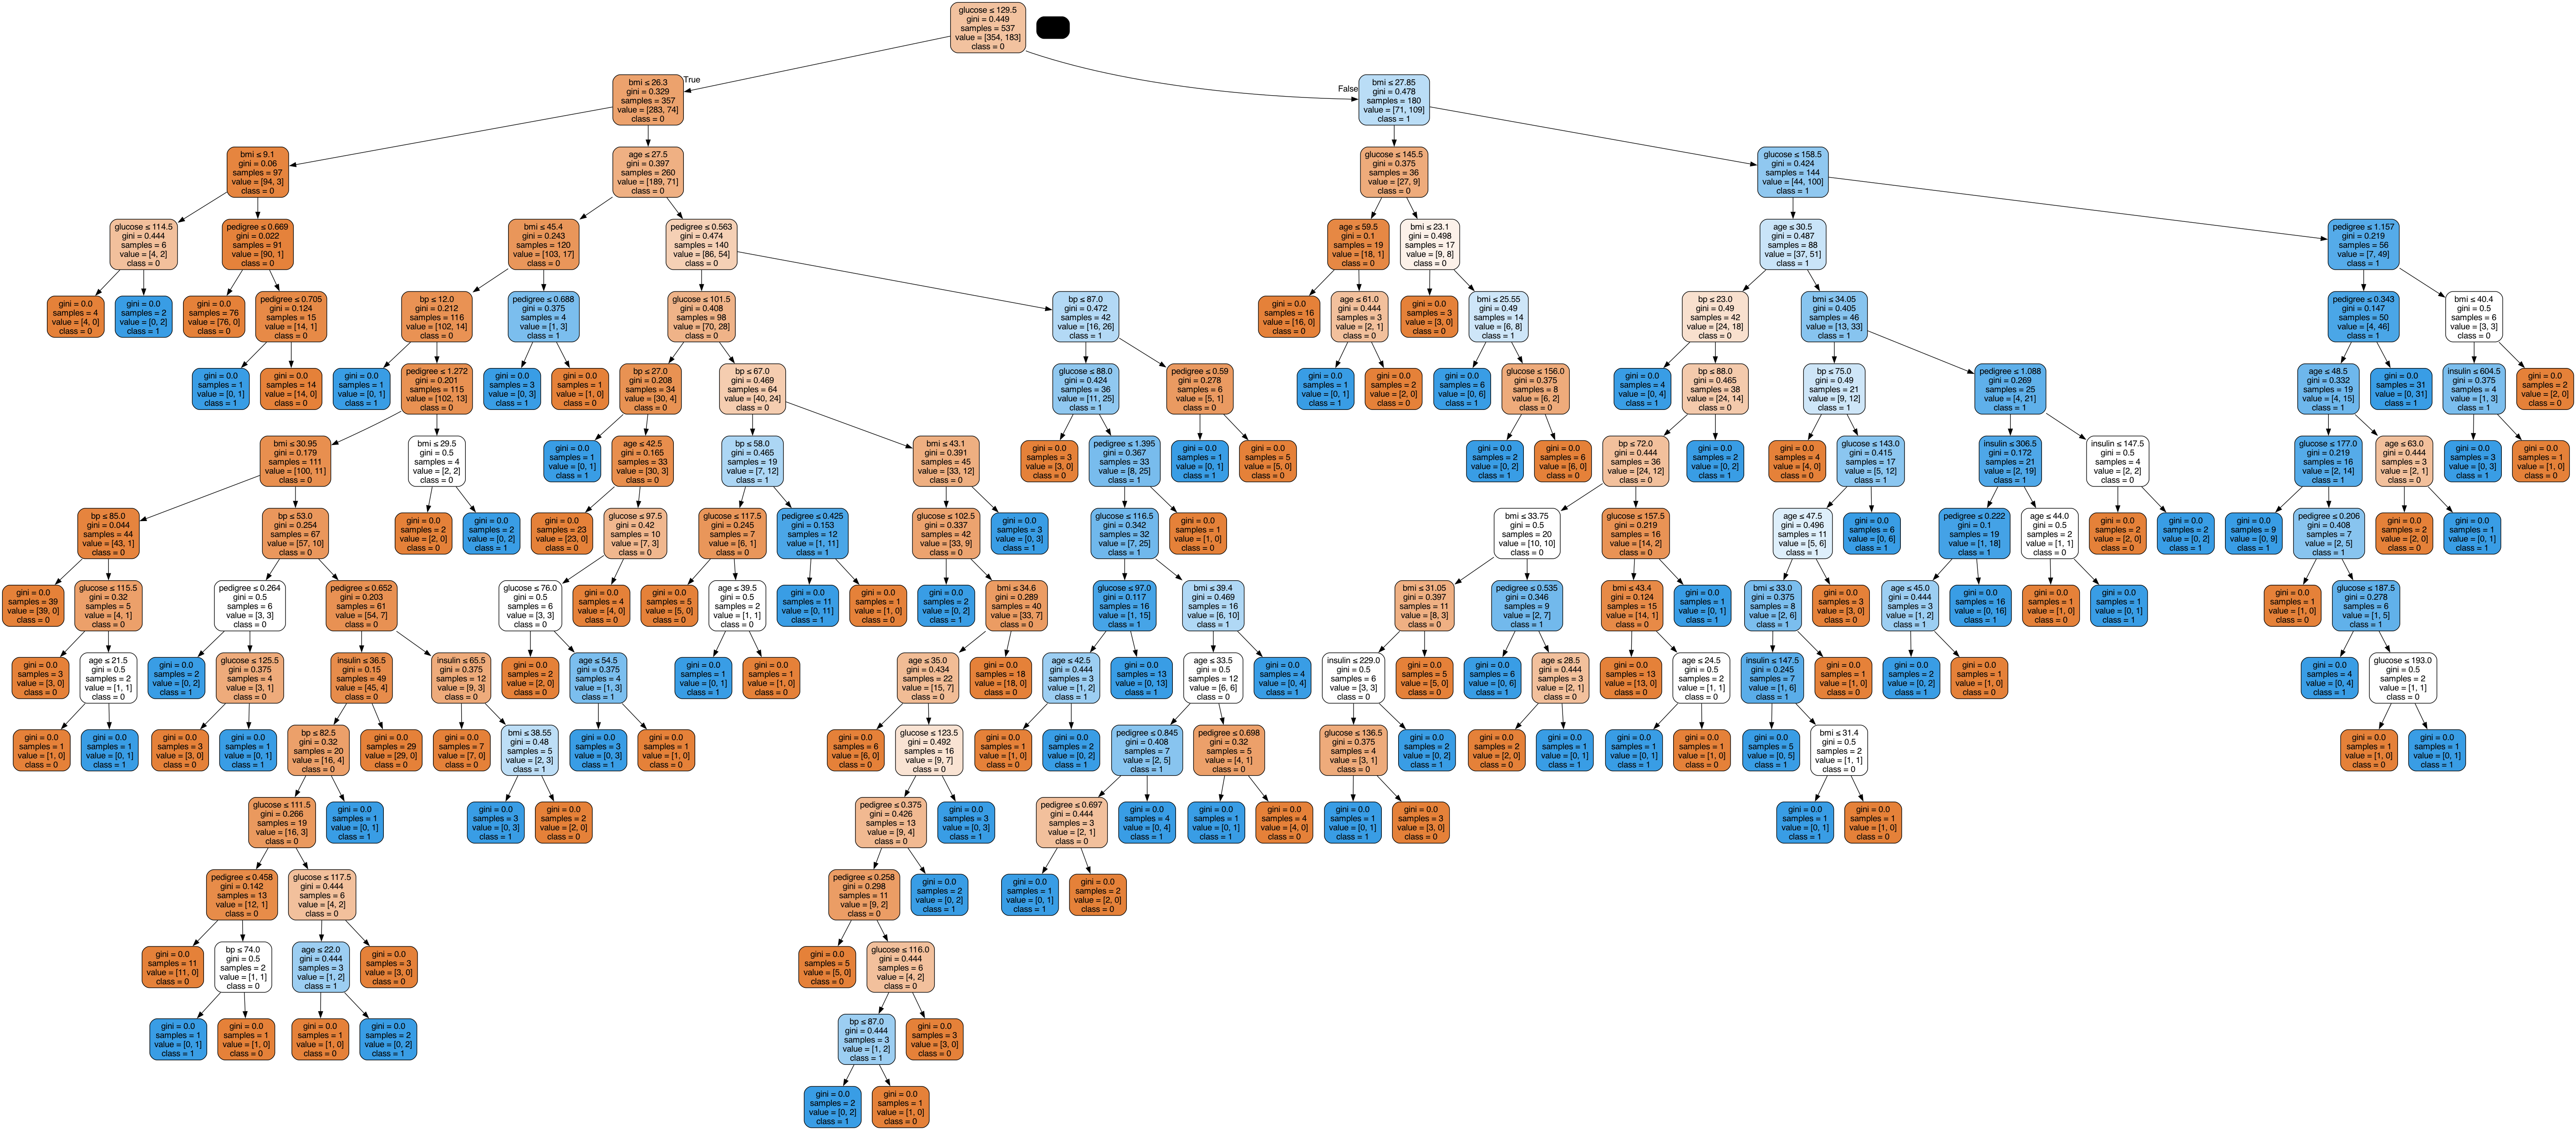

In [31]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [33]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


In [13]:
col_names = ["day","morning_temp","label"]

In [15]:
pima = pd.read_csv("test.csv", header=0, names=col_names)

In [7]:
pima

,day,morning_temp
0,20,0
1,25,1
2,27,1
3,15,0
4,22,1
5,27,1
6,30,0
7,12,0
0,22,0
1,23,1


In [19]:
feature_cols = [ "day","morning_temp","label"]
X = pima[feature_cols] # Features
y = pima.label # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) # 70% training and 30% test

In [21]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

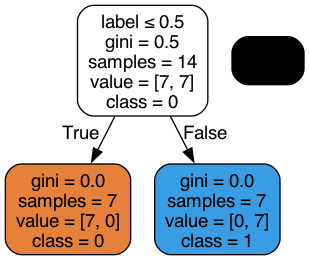

In [23]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [31]:
y_pred = clf.predict(X_train)

In [37]:
X_train

,day,morning_temp,label
7,7,12,0
2,2,27,1
6,6,30,0
10,2,22,1
4,4,22,1
1,1,25,1
14,6,31,0
0,0,20,0
15,7,11,0
9,1,23,1


In [35]:
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1])

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")